<a href="https://colab.research.google.com/github/AlineDion/DataLab_Projeto4/blob/main/DataLab_Projeto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataLAB para Amazon Sales**

#Conectar/importar dados para outras ferramentas

# Bibliotecas

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Dados

In [ ]:
product_df = pd.read_csv ('/content/amazon_product.csv')
review_df = pd.read_csv ('/content/amazon_review.csv')

In [ ]:
# Exibindo as primeiras 2 linhas do dataset
display(review_df.head(2))
display(product_df.head(2))

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269"
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4,"43,994"


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be..."


In [ ]:
# Mostrar número de linhas e colunas de cada tabela
print("Número de linhas e colunas na tabela product:")
display(product_df.shape)

print("\nNúmero de linhas e colunas na tabela review:")
display(review_df.shape)

Número de linhas e colunas na tabela product:


(1469, 7)


Número de linhas e colunas na tabela review:


(1465, 10)

# Identificar e Tratar Valores Nulos

In [ ]:
# Exibindo valores nulos nas tabelas:
print("Valores nulos em review_df:")
display(review_df.isnull().sum())

print("\nValores nulos em product_df:")
display(product_df.isnull().sum())

Valores nulos em review_df:


,0
user_id,0
user_name,0
review_id,0
review_title,0
review_content,0
img_link,466
product_link,466
product_id,0
rating,0
rating_count,2



Valores nulos em product_df:


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
about_product,4


In [ ]:
# Excluir linhas onde 'about_product' é nulo no DataFrame product
product_df.dropna(subset=['about_product'], inplace=True)

print("Número de linhas em product_df após remover nulos em 'about_product':", len(product_df))

print("\nValores nulos restantes em product_df:")
display(product_df.isnull().sum())

Número de linhas em product_df após remover nulos em 'about_product': 1465

Valores nulos restantes em product_df:


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
about_product,0


In [ ]:
# Excluir linhas onde 'rating_count' é nulo no DataFrame review
review_df.dropna(subset=['rating_count'], inplace=True)
print("Número de linhas em review_df após remover nulos em 'rating_count':", len(review_df))

print("\nValores nulos restantes em review_df:")
display(review_df.isnull().sum())

Número de linhas em review_df após remover nulos em 'rating_count': 1463

Valores nulos restantes em review_df:


,0
user_id,0
user_name,0
review_id,0
review_title,0
review_content,0
img_link,466
product_link,466
product_id,0
rating,0
rating_count,0


In [ ]:
# Listando número de linhas após a exclusão dos nulos
print("Número de linhas na tabela product após a exclusão de nulos:")
display(product_df.shape[0])

print("\nNúmero de linhas na tabela review após a exclusão de nulos:")
display(review_df.shape[0])

Número de linhas na tabela product após a exclusão de nulos:


1465


Número de linhas na tabela review após a exclusão de nulos:


1463

# Identificar e Tratar Valores Duplicados

In [ ]:
# Remover Duplicatas nos Dados com base na coluna 'product_id' do dataframe product
review_df.drop_duplicates(subset=['user_id', 'review_id', 'product_id'], inplace=True)
product_df.drop_duplicates(subset=['product_id'], inplace=True)

print("Número de linhas em review_df após remover duplicatas:", len(review_df))
print("Número de linhas em product_df após remover duplicatas:", len(product_df))

Número de linhas em review_df após remover duplicatas: 1359
Número de linhas em product_df após remover duplicatas: 1351


In [ ]:
# Exibir quantos registros duplicados foram eliminados do conjunto original.
original_review_df = pd.read_csv('/content/amazon_review.csv')
original_product_df = pd.read_csv('/content/amazon_product.csv')

removed_review_duplicates_count = len(original_review_df) - len(review_df)
removed_product_duplicates_count = len(original_product_df) - len(product_df)

print(f"Número de duplicatas removidas em review_df: {removed_review_duplicates_count}")
print(f"Número de duplicatas removidas em product_df: {removed_product_duplicates_count}")

Número de duplicatas removidas em review_df: 106
Número de duplicatas removidas em product_df: 118


In [ ]:
# Verificar duplicatas no DataFrame 'product' com base em 'product_id'
duplicatas_product_id = product_df.duplicated(subset=['product_id']).sum()
print(f"Número de duplicatas na coluna 'product_id' do DataFrame 'product': {duplicatas_product_id}")

# Verificar duplicatas no DataFrame 'review' com base em 'user_id', 'review_id', 'product_id'
duplicatas_review_subset = review_df.duplicated(subset=['user_id', 'review_id', 'product_id']).sum()
print(f"Número de duplicatas nas colunas ['user_id', 'review_id', 'product_id'] do DataFrame 'review': {duplicatas_review_subset}")

Número de duplicatas na coluna 'product_id' do DataFrame 'product': 0
Número de duplicatas nas colunas ['user_id', 'review_id', 'product_id'] do DataFrame 'review': 0


# Identificar e Tratar Dados Fora do Escopo de Análise

In [ ]:
print("\nInformações estatísticas de review_df:")
display(review_df.describe(include='all'))

print("\nInformações estatísticas de product_df:")
display(product_df.describe(include='all'))

# Converter a coluna 'rating' para tipo numérico, tratando erros como NaN (caso haja valores inválidos)
review_df['rating'] = pd.to_numeric(review_df['rating'], errors='coerce')

# Definir os limites válidos de avaliação (rating)
min_rating = 1
max_rating = 5

# Filtrar linhas com valores de avaliação fora do escopo definido
out_of_scope_reviews = review_df[(review_df['rating'] < min_rating) | (review_df['rating'] > max_rating)]

print(f"\nAvaliações fora do escopo ({min_rating}-{max_rating}) em review_df:")
display(out_of_scope_reviews)

# Para colunas categóricas, verificar valores únicos para identificar inconsistências ou dados inesperados.
print("\nValores únicos em colunas categóricas de review_df:")
categorical_cols_review = review_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_review:
    print(f"{col}: {review_df[col].unique()[:1]}...") # Mostrar o primeiro 1 valor encontrado

print("\nValores únicos em colunas categóricas de product_df:")
categorical_cols_product = product_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_product:
    print(f"{col}: {product_df[col].unique()[:1]}...") # Mostrar o primeiro 1 valore encontrado


Informações estatísticas de review_df:


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
count,1359,1359,1359,1359,1359,899,899,1359,1359,1359
unique,1192,1192,1192,1192,1203,875,899,1349,26,1122
top,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...","Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simr...","R2K5OD0MEEBTDL,RS1N6TNO33BOK,R6KWBGOKI1N9Y,R30...","Phone, camera, heating - works for me, may not...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/TP-Link-TL-WA855RE-Wi-Fi...,B09YV4MW2T,4.1,"9,378"
freq,8,8,8,8,8,3,1,2,227,9



Informações estatísticas de product_df:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
count,1351,1351,1351,1351,1351,1351,1351
unique,1351,1337,211,549,449,92,1290
top,B01486F4G6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹299,₹999,50%,Upto 12GB RAM with RAM Plus | 128GB internal m...
freq,1,5,161,42,106,54,4



Avaliações fora do escopo (1-5) em review_df:


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count



Valores únicos em colunas categóricas de review_df:
user_id: ['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ']...
user_name: ['Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM']...
review_id: ['R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I']...
review_title: ['Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good']...
review_content: ['Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/

In [ ]:
# Excluir as colunas 'img_link' e 'product_link' do DataFrame review pois não serão relevantes para a análise
review_df.drop(['img_link', 'product_link'], axis=1, inplace=True)

In [ ]:
# Verificando se todas as correções até o momento foram feitas corretamente
print("DataFrame 'product' após exclusão de linhas nulas em 'about_product':")
display(product_df.head())
print("\nContagem de nulos em 'about_product' no DataFrame 'product':")
print(product_df['about_product'].isnull().sum())


print("\nDataFrame 'review' após exclusão de linhas nulas em 'rating_count' e colunas 'img_link' e 'product_link':")
display(review_df.head())
print("\nContagem de nulos em 'rating_count' no DataFrame 'review':")
print(review_df['rating_count'].isnull().sum())
print("\nColunas restantes no DataFrame 'review':")
print(review_df.columns)

DataFrame 'product' após exclusão de linhas nulas em 'about_product':


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...



Contagem de nulos em 'about_product' no DataFrame 'product':
0

DataFrame 'review' após exclusão de linhas nulas em 'rating_count' e colunas 'img_link' e 'product_link':


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,B07JW9H4J1,4.2,"24,269"
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,B098NS6PVG,4.0,"43,994"
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",B096MSW6CT,3.9,"7,928"
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",B08HDJ86NZ,4.2,"94,363"
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",B08CF3B7N1,4.2,"16,905"



Contagem de nulos em 'rating_count' no DataFrame 'review':
0

Colunas restantes no DataFrame 'review':
Index(['user_id', 'user_name', 'review_id', 'review_title', 'review_content',
       'product_id', 'rating', 'rating_count'],
      dtype='object')


# Identificar e Tratar Dados Discrepantes em Variáveis Categóricas, Numéricas e Verificação do Tipo de Dados

In [ ]:
print("Valores únicos em colunas categóricas de review_df:")
categorical_cols_review = review_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols_review:
    uniques = review_df[col].dropna().unique()
    standardized_uniques = pd.Series(uniques).astype(str).str.strip().str.lower().unique()

    discrepancias_potenciais = len(uniques) - len(standardized_uniques)
    exemplo_valores = uniques[:1] # Mostrar o primeiro 1 valor encontrado

    print(f"\nColuna: {col}")
    print(f"Valores únicos (limitado a 1): {exemplo_valores}")
    print(f"Total de valores únicos: {len(uniques)}")
    print(f"Possíveis discrepâncias de caixa/espaco: {discrepancias_potenciais}")

print("\nValores únicos em colunas categóricas de product_df:")
categorical_cols_product = product_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols_product:
    uniques = product_df[col].dropna().unique()
    standardized_uniques = pd.Series(uniques).astype(str).str.strip().str.lower().unique()

    discrepancias_potenciais = len(uniques) - len(standardized_uniques)
    exemplo_valores = uniques[:1] # Mostrar o primeiro 1 valor encontrado

    print(f"\nColuna: {col}")
    print(f"Valores únicos (limitado a 1): {exemplo_valores}")
    print(f"Total de valores únicos: {len(uniques)}")
    print(f"Possíveis discrepâncias de caixa/espaco: {discrepancias_potenciais}")


Valores únicos em colunas categóricas de review_df:

Coluna: user_id
Valores únicos (limitado a 1): ['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ']
Total de valores únicos: 1191
Possíveis discrepâncias de caixa/espaco: 0

Coluna: user_name
Valores únicos (limitado a 1): ['Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM']
Total de valores únicos: 1191
Possíveis discrepâncias de caixa/espaco: 0

Coluna: review_id
Valores únicos (limitado a 1): ['R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I']
Total de valores únicos: 1191
Possíveis discrepâncias de caixa/espaco: 0

Coluna: review_title
Valores únicos (limitado a 1): ['Satisfied,Charging is really fast,Value for money,Product review,Good quality,G

In [ ]:
# Converter strings para dados numéricos e remover símbolos
def convert_price_to_numeric(price_str):
    if isinstance(price_str, str):
        return float(price_str.replace('₹', '').replace(',', ''))
    return price_str

# Aplicar a função para as colunas 'discounted_price' e 'actual_price'
product_df['discounted_price'] = product_df['discounted_price'].apply(convert_price_to_numeric)
product_df['actual_price'] = product_df['actual_price'].apply(convert_price_to_numeric)

print("Tipo de dado após conversão:")
display(product_df.dtypes)

print("\nExiba as primeiras 5 colunas:")
display(product_df.head())

Tipo de dado após conversão:


,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,int64
about_product,object
diferenca_preco,float64
categoria_principal,object



Exiba as primeiras 5 colunas:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,diferenca_preco,categoria_principal
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,High Compatibility : Compatible With iPhone 12...,700.0,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,"Compatible with all Type C enabled devices, be...",150.0,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,【 Fast Charger& Data Sync】-With built-in safet...,1700.0,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,The boAt Deuce USB 300 2 in 1 cable is compati...,370.0,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,[CHARGE & SYNC FUNCTION]- This cable comes wit...,245.0,Computers&Accessories


In [ ]:
# Converter a coluna 'rating' para numérica, tratando erros
review_df['rating'] = pd.to_numeric(review_df['rating'], errors='coerce')

# Definir o intervalo esperado para as avaliações
min_rating = 1
max_rating = 5

# Filtrar avaliações fora do escopo
review_df = review_df[(review_df['rating'] >= min_rating) & (review_df['rating'] <= max_rating)]

print(f"Número de linhas em review_df após filtrar avaliações fora do escopo: {len(review_df)}")

# Verificar se ainda há valores nulos na coluna 'rating' após a conversão e filtragem
print("\nValores nulos na coluna 'rating' após filtragem:")
display(review_df['rating'].isnull().sum())

print("Conferir tipo de dado após conversão:")
display(review_df.dtypes)

Número de linhas em review_df após filtrar avaliações fora do escopo: 1358

Valores nulos na coluna 'rating' após filtragem:


np.int64(0)

Conferir tipo de dado após conversão:


,0
user_id,object
user_name,object
review_id,object
review_title,object
review_content,object
product_id,object
rating,float64
rating_count,object


In [ ]:
# Identificar outliers usando IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("Outliers identificados em review_df (usando IQR):")
for col in review_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_iqr(review_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers.head(1))
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")

print("\nOutliers identificados em product_df (usando IQR):")
for col in product_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_iqr(product_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers.head(1))
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")

Outliers identificados em review_df (usando IQR):

Coluna: rating - Total de outliers: 17


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count
142,"AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...","Girija Mohapatra,ShanChan83,Jai Ashvan,Sandeep...","RSFPLEMO7DSOR,RG7SBYTNG42XA,ROR2RQZ4G72JO,R12G...","Rmote for MI TV,Good,Good but low quality,Remo...",TV remote is the replica of the original one s...,B08RX8G496,3.2,285



Outliers identificados em product_df (usando IQR):

Coluna: discounted_price - Total de outliers: 209


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44%,"Note : The brands, Mi and Xiaomi, are part of ..."



Coluna: actual_price - Total de outliers: 185


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44%,"Note : The brands, Mi and Xiaomi, are part of ..."


In [ ]:
from scipy.stats import zscore
import numpy as np

# Identificar outliers usando Z-Score
def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

print("Outliers identificados em review_df (usando Z-Score com threshold=3):")
for col in review_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_zscore(review_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
       display(outliers.head(1))
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")


print("\nOutliers identificados em product_df (usando Z-Score com threshold=3):")
for col in product_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_zscore(product_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers.head(1))
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")

Outliers identificados em review_df (usando Z-Score com threshold=3):

Coluna: rating - Total de outliers: 17


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count
142,"AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...","Girija Mohapatra,ShanChan83,Jai Ashvan,Sandeep...","RSFPLEMO7DSOR,RG7SBYTNG42XA,ROR2RQZ4G72JO,R12G...","Rmote for MI TV,Good,Good but low quality,Remo...",TV remote is the replica of the original one s...,B08RX8G496,3.2,285



Outliers identificados em product_df (usando Z-Score com threshold=3):

Coluna: discounted_price - Total de outliers: 40


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28%,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...



Coluna: actual_price - Total de outliers: 36


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28%,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...


Visualização da distribuição para colunas numéricas em review_df:


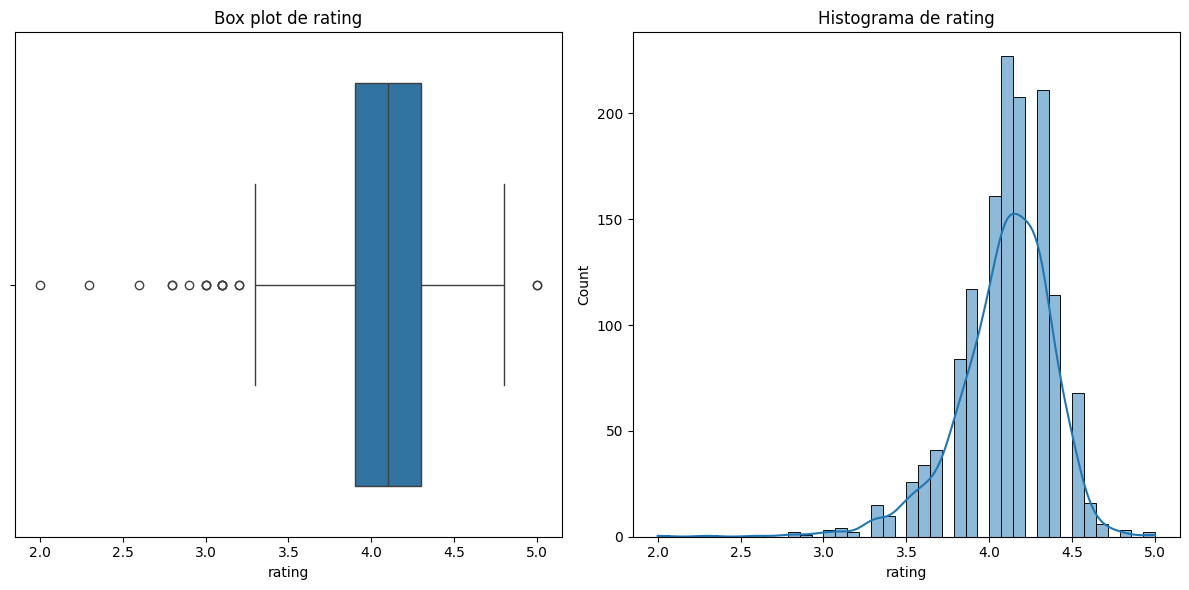


Visualização da distribuição para colunas numéricas em product_df:


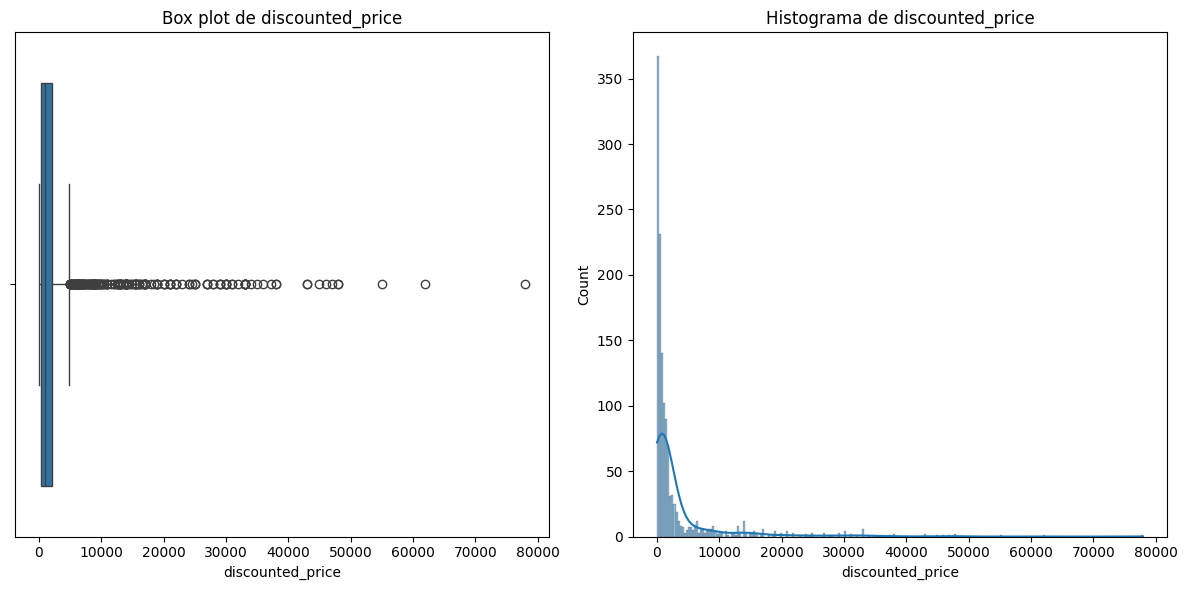

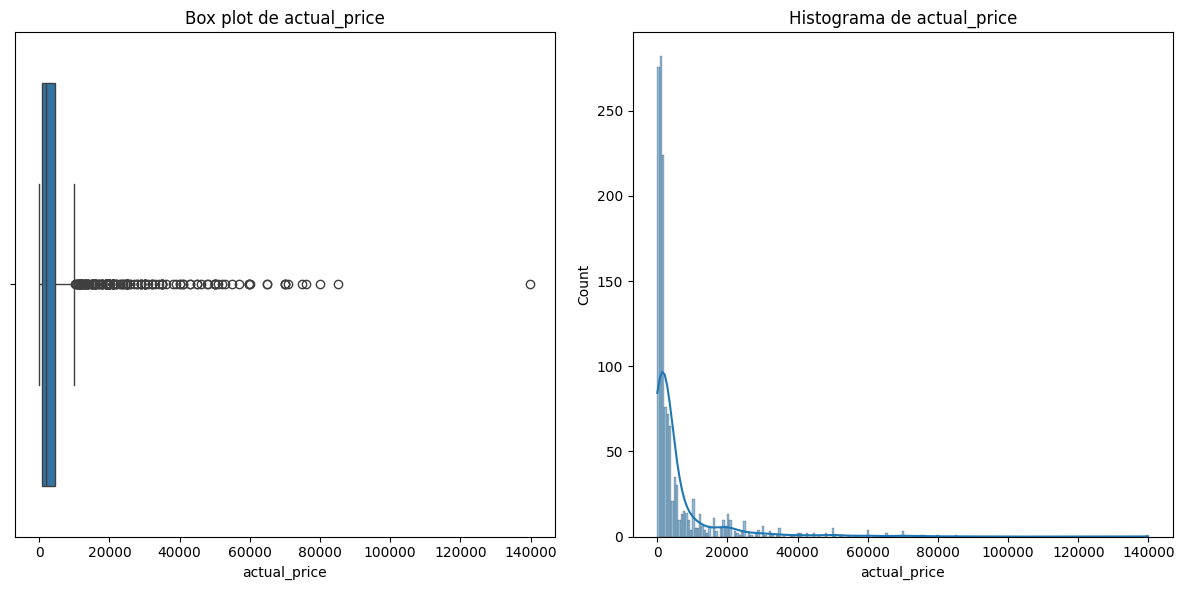

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização para colunas numéricas em review_df
print("Visualização da distribuição para colunas numéricas em review_df:")
for col in review_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=review_df[col])
    plt.title(f'Box plot de {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(review_df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.tight_layout()
    plt.show()

# Visualização para colunas numéricas em product_df
print("\nVisualização da distribuição para colunas numéricas em product_df:")
for col in product_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=product_df[col])
    plt.title(f'Box plot de {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(product_df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.tight_layout()
    plt.show()

# Criar Variáveis

**Diferença de Preço:** Representa a economia em reais obtida com o desconto, calculada subtraindo o preço com desconto do preço original do produto.

**Categoria Principal:** Corresponde ao primeiro nível da hierarquia da categoria do produto, agrupando-os de forma simplificada para facilitar comparações entre grandes grupos.

In [ ]:
# Criar a coluna 'diferenca_preco'
product_df['diferenca_preco'] = product_df['actual_price'] - product_df['discounted_price']

# Criar a coluna 'categoria_principal'
# Extrair a primeira categoria antes do primeiro '|'
product_df['categoria_principal'] = product_df['category'].astype(str).str.split('|', expand=True)[0]

print("Primeiras 5 linhas do dataframe product_df com as novas colunas:")
display(product_df.head())

Primeiras 5 linhas do dataframe product_df com as novas colunas:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,diferenca_preco,categoria_principal
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,High Compatibility : Compatible With iPhone 12...,700.0,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,"Compatible with all Type C enabled devices, be...",150.0,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,【 Fast Charger& Data Sync】-With built-in safet...,1700.0,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,The boAt Deuce USB 300 2 in 1 cable is compati...,370.0,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...,245.0,Computers&Accessories


# Unir Tabelas

In [ ]:
# Unir os dataframes product_df e review_df usando a coluna 'product_id'
unificada_df = pd.merge(product_df, review_df, on='product_id', how='inner')

print("Primeiras 5 linhas do dataframe unido:")
display(unificada_df.head())

print("\nNúmero de linhas e colunas no dataframe unido:")
display(unificada_df.shape)

Primeiras 5 linhas do dataframe unido:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,diferenca_preco,categoria_principal,user_id,user_name,review_id,review_title,review_content,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,High Compatibility : Compatible With iPhone 12...,700.0,Computers&Accessories,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,4.2,"24,269"
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,"Compatible with all Type C enabled devices, be...",150.0,Computers&Accessories,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,4.0,"43,994"
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,【 Fast Charger& Data Sync】-With built-in safet...,1700.0,Computers&Accessories,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",3.9,"7,928"
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,The boAt Deuce USB 300 2 in 1 cable is compati...,370.0,Computers&Accessories,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",4.2,"94,363"
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...,245.0,Computers&Accessories,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",4.2,"16,905"



Número de linhas e colunas no dataframe unido:


(1358, 16)

In [ ]:
# contagem de valores nulos após união das tabelas
print("Contagem de valores nulos no dataframe unido:")
display(unificada_df.isnull().sum())

Contagem de valores nulos no dataframe unido:


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
about_product,0
diferenca_preco,0
categoria_principal,0
user_id,0


# Agrupar dados de acordo com variáveis categóricas

In [ ]:
# Agrupar por 'categoria_principal' e calcular a média das colunas numéricas

# Convert 'discount_percentage' to numeric after removing '%'
unificada_df['discount_percentage'] = unificada_df['discount_percentage'].astype(str).str.replace('%', '').astype(float)

# Convert 'rating_count' to numeric after removing ','
unificada_df['rating_count'] = unificada_df['rating_count'].astype(str).str.replace(',', '').astype(float)


categoria_principal_grouped = unificada_df.groupby('categoria_principal').agg(
    mean_discounted_price=('discounted_price', 'mean'),
    mean_actual_price=('actual_price', 'mean'),
    mean_discount_percentage=('discount_percentage', 'mean'),
    mean_diferenca_preco=('diferenca_preco', 'mean'),
    mean_rating=('rating', 'mean'),
    mean_rating_count=('rating_count', 'mean'),
    product_count=('product_id', 'count')
).reset_index()

print("Agregação por categoria_principal:")
display(categoria_principal_grouped)

# Calcular o percentual de produtos em cada categoria em relação ao total de produtos
total_products = unificada_df.shape[0]
categoria_principal_grouped['percentage_of_products'] = (categoria_principal_grouped['product_count'] / total_products) * 100

print("\nAgregação por categoria_principal com porcentagem de produtos:")
display(categoria_principal_grouped)

Agregação por categoria_principal:


,categoria_principal,mean_discounted_price,mean_actual_price,mean_discount_percentage,mean_diferenca_preco,mean_rating,mean_rating_count,product_count
0,Car&Motorbike,2339.000000,4000.000000,42.000000,1661.000000,3.800000,1118.000000,1
1,Computers&Accessories,943.252944,1850.984828,53.326260,907.731883,4.153581,17026.026525,377
2,Electronics,6172.820565,10364.608871,50.120968,4191.788306,4.077823,29240.120968,496
3,Health&PersonalCare,899.000000,1900.000000,53.000000,1001.000000,4.000000,3663.000000,1
4,Home&Kitchen,2331.133803,4165.794183,40.174497,1834.660380,4.040716,6689.210291,447
5,HomeImprovement,337.000000,799.000000,57.500000,462.000000,4.250000,4283.000000,2
6,MusicalInstruments,638.000000,1347.000000,46.000000,709.000000,3.900000,44441.000000,2
7,OfficeProducts,301.580645,397.193548,12.354839,95.612903,4.309677,4828.225806,31
8,Toys&Games,150.000000,150.000000,0.000000,0.000000,4.300000,15867.000000,1



Agregação por categoria_principal com porcentagem de produtos:


,categoria_principal,mean_discounted_price,mean_actual_price,mean_discount_percentage,mean_diferenca_preco,mean_rating,mean_rating_count,product_count,percentage_of_products
0,Car&Motorbike,2339.000000,4000.000000,42.000000,1661.000000,3.800000,1118.000000,1,0.073638
1,Computers&Accessories,943.252944,1850.984828,53.326260,907.731883,4.153581,17026.026525,377,27.761414
2,Electronics,6172.820565,10364.608871,50.120968,4191.788306,4.077823,29240.120968,496,36.524300
3,Health&PersonalCare,899.000000,1900.000000,53.000000,1001.000000,4.000000,3663.000000,1,0.073638
4,Home&Kitchen,2331.133803,4165.794183,40.174497,1834.660380,4.040716,6689.210291,447,32.916053
5,HomeImprovement,337.000000,799.000000,57.500000,462.000000,4.250000,4283.000000,2,0.147275
6,MusicalInstruments,638.000000,1347.000000,46.000000,709.000000,3.900000,44441.000000,2,0.147275
7,OfficeProducts,301.580645,397.193548,12.354839,95.612903,4.309677,4828.225806,31,2.282769
8,Toys&Games,150.000000,150.000000,0.000000,0.000000,4.300000,15867.000000,1,0.073638


# Ver variáveis ​​categóricas

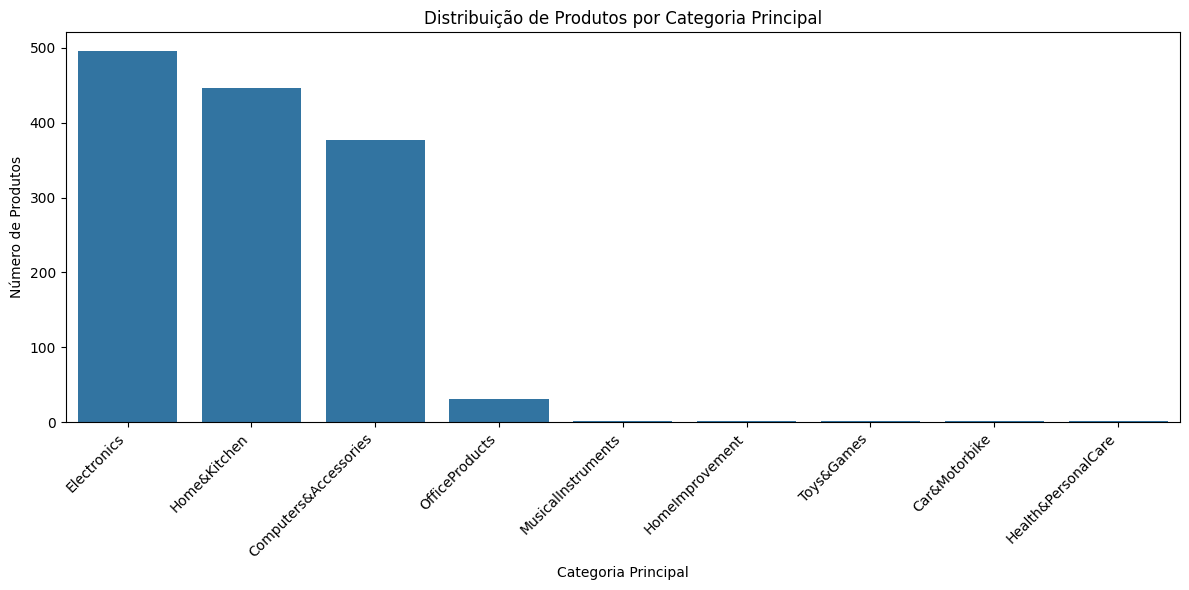

In [ ]:
# Contar a frequência de cada categoria principal
categoria_principal_counts = unificada_df['categoria_principal'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=categoria_principal_counts.index, y=categoria_principal_counts.values)
plt.title('Distribuição de Produtos por Categoria Principal')
plt.xlabel('Categoria Principal')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Proporção de cada Categoria Principal:
categoria_principal
Electronics              36.524300
Home&Kitchen             32.916053
Computers&Accessories    27.761414
OfficeProducts            2.282769
MusicalInstruments        0.147275
HomeImprovement           0.147275
Toys&Games                0.073638
Car&Motorbike             0.073638
Health&PersonalCare       0.073638
Name: proportion, dtype: float64


/tmp/ipython-input-339-3470324653.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_4_categorias.index, y=top_4_categorias.values, palette='viridis')


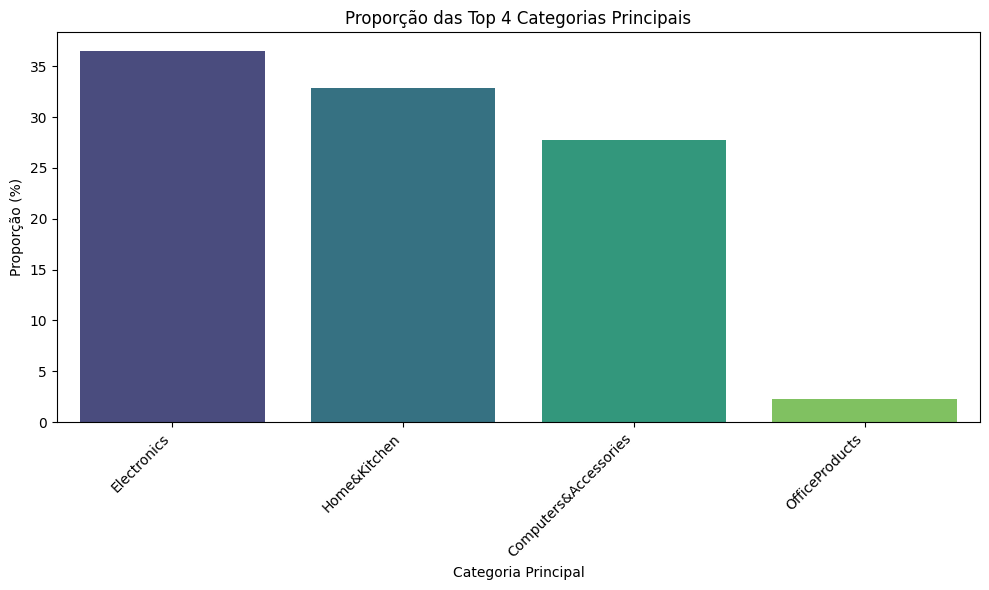

In [ ]:
# Calcular a proporção das categorias principais
proporcao_categorias = unificada_df['categoria_principal'].value_counts(normalize=True) * 100

print("Proporção de cada Categoria Principal:")
print(proporcao_categorias)

# Selecionar as top 4 categorias
top_4_categorias = proporcao_categorias.head(4)

# Criar gráfico de barras para visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=top_4_categorias.index, y=top_4_categorias.values, palette='viridis')
plt.title('Proporção das Top 4 Categorias Principais')
plt.xlabel('Categoria Principal')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Medidas de Tendência Central

In [ ]:
numerical_cols = unificada_df.select_dtypes(include=np.number).columns

print("Estatísticas de Tendência Central para Variáveis Numéricas:")

# Calcular Média, Mediana e Moda para cada coluna numérica
for col in numerical_cols:
    mean_val = unificada_df[col].mean()
    median_val = unificada_df[col].median()
    mode_val = unificada_df[col].mode()

    print(f"\n--- Coluna: {col} ---")
    print(f"Média: {mean_val:.2f}")
    print(f"Mediana: {median_val:.2f}")
    print(f"Moda: {list(mode_val.round(2))}")

Estatísticas de Tendência Central para Variáveis Numéricas:

--- Coluna: discounted_price ---
Média: 3294.57
Mediana: 899.00
Moda: [299.0]

--- Coluna: actual_price ---
Média: 5687.36
Mediana: 1795.00
Moda: [999.0]

--- Coluna: discount_percentage ---
Média: 46.84
Mediana: 49.00
Moda: [50.0]

--- Coluna: diferenca_preco ---
Média: 2392.79
Mediana: 803.50
Moda: [0.0]

--- Coluna: rating ---
Média: 4.09
Mediana: 4.10
Moda: [4.1]

--- Coluna: rating_count ---
Média: 17805.42
Mediana: 4863.00
Moda: [9378.0]


Para as variáveis discounted_price, actual_price, diferenca_preco e rating_count, onde identificamos outliers e distribuições assimétricas, a mediana é de fato uma melhor representação do valor central do que a média, pois não é distorcida pelos valores atípicos

# Aplicar medidas de dispersão

In [ ]:
print("Medidas de Dispersão para Variáveis Numéricas:")

# Calcular Desvio Padrão, Variância e Intervalo Interquartílico para cada coluna numérica
for col in numerical_cols:
    std_dev = unificada_df[col].std()
    variance = unificada_df[col].var()
    Q1 = unificada_df[col].quantile(0.25)
    Q3 = unificada_df[col].quantile(0.75)
    IQR = Q3 - Q1

    print(f"\n--- Coluna: {col} ---")
    print(f"Desvio Padrão: {std_dev:.2f}")
    print(f"Variância: {variance:.2f}")
    print(f"Intervalo Interquartílico (IQR): {IQR:.2f}")

Medidas de Dispersão para Variáveis Numéricas:

--- Coluna: discounted_price ---
Desvio Padrão: 7157.17
Variância: 51225039.88
Intervalo Interquartílico (IQR): 1827.50

--- Coluna: actual_price ---
Desvio Padrão: 11191.95
Variância: 125259740.36
Intervalo Interquartílico (IQR): 3738.50

--- Coluna: discount_percentage ---
Desvio Padrão: 21.65
Variância: 468.53
Intervalo Interquartílico (IQR): 31.75

--- Coluna: diferenca_preco ---
Desvio Padrão: 4727.66
Variância: 22350725.68
Intervalo Interquartílico (IQR): 1620.75

--- Coluna: rating ---
Desvio Padrão: 0.29
Variância: 0.09
Intervalo Interquartílico (IQR): 0.40

--- Coluna: rating_count ---
Desvio Padrão: 42161.54
Variância: 1777595836.57
Intervalo Interquartílico (IQR): 15370.00


Pelo output, rating_count e diferenca_preco têm desvios padrão altos, o que confirma a grande variação nesses valores que vimos nos box plots. O rating tem um **desvio padrão baixo**, indicando que as avaliações tendem a estar mais próximas da média (entre 4 e 5).

# Correlação entre variáveis numéricas

In [ ]:
# Calcular a matriz de correlação de Pearson para as variáveis numéricas
correlation_matrix = unificada_df[numerical_cols].corr(method='pearson')

print("Matriz de Correlação de Pearson entre as variáveis numéricas:")
display(correlation_matrix)

Matriz de Correlação de Pearson entre as variáveis numéricas:


,discounted_price,actual_price,discount_percentage,diferenca_preco,rating,rating_count
discounted_price,1.000000,0.962103,-0.237639,0.763728,0.127307,-0.025049
actual_price,0.962103,1.000000,-0.112198,0.910814,0.128014,-0.034842
discount_percentage,-0.237639,-0.112198,1.000000,0.094150,-0.162386,0.007621
diferenca_preco,0.763728,0.910814,0.094150,1.000000,0.110324,-0.044561
rating,0.127307,0.128014,-0.162386,0.110324,1.000000,0.098156
rating_count,-0.025049,-0.034842,0.007621,-0.044561,0.098156,1.000000


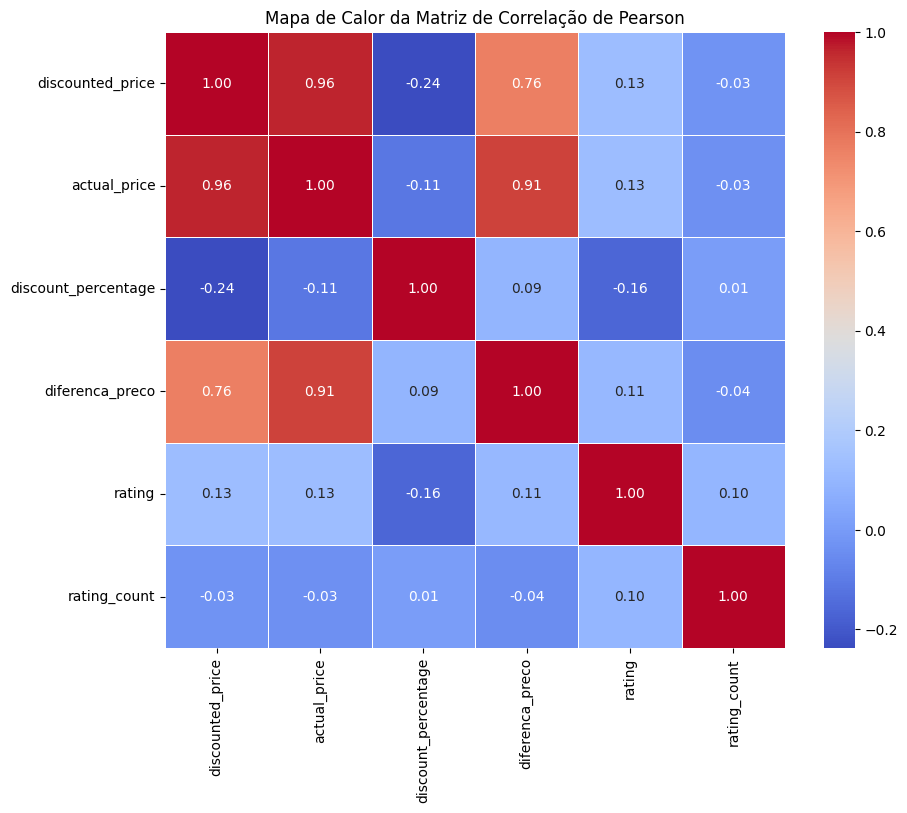

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação de Pearson')
plt.show()

### **Resumo dos Resultados de Correlação:**

- **Fortes Correlações Positivas:**
    - `discounted_price` e `actual_price` (~0.96),
    - `actual_price` e `diferenca_preco` (~0.91),
    - `discounted_price` e `diferenca_preco` (~0.76).
        
        Essas relações mostram que preços mais altos, com ou sem desconto, estão fortemente associados entre si e com maiores valores de desconto absoluto, o que é esperado.
        
- **Correlações Fracas:**
    - `rating` e `rating_count` têm correlação fraca com variáveis de preço e desconto, indicando pouca ou nenhuma relação linear entre avaliação dos produtos e seus preços ou descontos.
- **Correlações Negativas Fracas a Moderadas:**
    - `discount_percentage` com `discounted_price` (–0.24) e `actual_price` (–0.11).
        
        Produtos com maior percentual de desconto tendem a ter preços mais baixos, sugerindo que itens mais baratos recebem descontos percentuais maiores.

In [ ]:
# Criar segmentos com base na categoria principal
segmented_by_categoria_principal = unificada_df.groupby('categoria_principal')

# Exibir o resumo estatístico para cada segmento (categoria principal)
print("Resumo Estatístico por Categoria Principal:")
display(segmented_by_categoria_principal.describe())

Resumo Estatístico por Categoria Principal:


discounted_price                                     \
                                 count         mean           std     min   
categoria_principal                                                         
Car&Motorbike                      1.0  2339.000000           NaN  2339.0   
Computers&Accessories            377.0   943.252944   2598.466809    39.0   
Electronics                      496.0  6172.820565  10508.510464    79.0   
Health&PersonalCare                1.0   899.000000           NaN   899.0   
Home&Kitchen                     447.0  2331.133803   3471.271525    79.0   
HomeImprovement                    2.0   337.000000    124.450793   249.0   
MusicalInstruments                 2.0   638.000000    226.274170   478.0   
OfficeProducts                    31.0   301.580645    317.288699    50.0   
Toys&Games                         1.0   150.000000           NaN   150.0   

                                                        actual_price  \
                          25%     50%      75%      max        count   
categoria_principal                                                    
Car&Motorbike          2339.0  2339.0  2339.00   2339.0          1.0   
Computers&Accessories   249.0   399.0   849.00  37247.0        377.0   
Electronics             399.0  1399.0  7935.75  77990.0        496.0   
Health&PersonalCare     899.0   899.0   899.00    899.0          1.0   
Home&Kitchen            630.0  1199.0  2696.50  42990.0        447.0   
HomeImprovement         293.0   337.0   381.00    425.0          2.0   
MusicalInstruments      558.0   638.0   718.00    798.0          2.0   
OfficeProducts          117.0   178.0   380.50   1399.0         31.0   
Toys&Games              150.0   150.0   150.00    150.0          1.0   

                                     ... rating      rating_count  \
                               mean  ...    75%  max        count   
categoria_principal                  ...                            
Car&Motorbike           4000.000000  ...  3.800  3.8          1.0   
Computers&Accessories   1850.984828  ...  4.300  5.0        377.0   
Electronics            10364.608871  ...  4.300  4.7        496.0   
Health&PersonalCare     1900.000000  ...  4.000  4.0          1.0   
Home&Kitchen            4165.794183  ...  4.200  4.8        447.0   
HomeImprovement          799.000000  ...  4.375  4.5          2.0   
MusicalInstruments      1347.000000  ...  3.950  4.0          2.0   
OfficeProducts           397.193548  ...  4.400  4.5         31.0   
Toys&Games               150.000000  ...  4.300  4.3          1.0   

                                                                              \
                               mean           std      min      25%      50%   
categoria_principal                                                            
Car&Motorbike           1118.000000           NaN   1118.0   1118.0   1118.0   
Computers&Accessories  17026.026525  31000.986310      5.0   1667.0   7318.0   
Electronics            29240.120968  60316.664745      7.0   1633.5   9359.0   
Health&PersonalCare     3663.000000           NaN   3663.0   3663.0   3663.0   
Home&Kitchen            6689.210291  16454.176198      2.0    550.0   2311.0   
HomeImprovement         4283.000000   2406.991483   2581.0   3432.0   4283.0   
MusicalInstruments     44441.000000  34256.495121  20218.0  32329.5  44441.0   
OfficeProducts          4828.225806   2853.095766    388.0   2844.5   4426.0   
Toys&Games             15867.000000           NaN  15867.0  15867.0  15867.0   

                                          
                           75%       max  
categoria_principal                       
Car&Motorbike           1118.0    1118.0  
Computers&Accessories  20053.0  253105.0  
Electronics            27850.0  426973.0  
Health&PersonalCare     3663.0    3663.0  
Home&Kitchen            7257.5  270563.0  
HomeImprovement         5134.0    5985.0  
MusicalInstruments     56552.5   68664.0  
OfficeProduc

# Validação de hipóteses

### Hipótese 1 - Quanto maior o desconto, melhor será a pontuação?


--- Análise da Hipótese 1: Desconto vs. Pontuação ---
Correlação de Spearman entre Desconto e Rating: -0.1512, P-valor: 0.0000


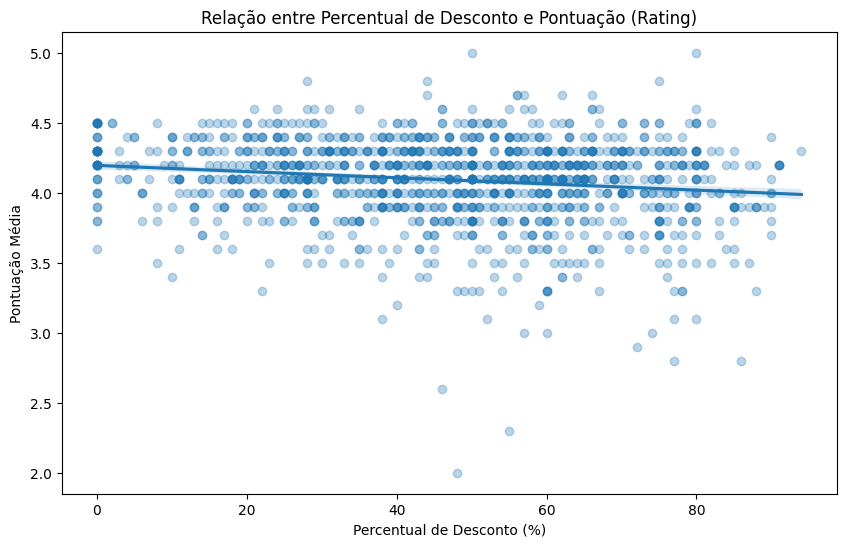

In [ ]:
print("\n--- Análise da Hipótese 1: Desconto vs. Pontuação ---")

# Correlação de Spearman (mais robusta a outliers e relações não lineares)
spearman_corr_h1, spearman_p_value_h1 = stats.spearmanr(unificada_df['discount_percentage'], unificada_df['rating'])
print(f"Correlação de Spearman entre Desconto e Rating: {spearman_corr_h1:.4f}, P-valor: {spearman_p_value_h1:.4f}")

# Visualização (Scatter plot com linha de regressão)
plt.figure(figsize=(10, 6))
sns.regplot(x='discount_percentage', y='rating', data=unificada_df, scatter_kws={'alpha':0.3})
plt.title('Relação entre Percentual de Desconto e Pontuação (Rating)')
plt.xlabel('Percentual de Desconto (%)')
plt.ylabel('Pontuação Média')
plt.show()

A correlação negativa fraca encontrada indica que, no conjunto de dados analisado, existe uma tendência sutil de que produtos com maiores descontos recebam pontuações ligeiramente menores. Apesar de a força da correlação ser baixa, o resultado é estatisticamente significativo, o que nos permite rejeitar a hipótese nula de ausência de correlação.

### Hipótese 2 - Quanto maior o número de pessoas que avaliaram o produto, melhor será a classificação?


--- Análise da Hipótese 2: Número de Avaliações vs. Classificação ---
Correlação de Pearson entre Rating Count e Rating: 0.0982, P-valor: 0.0003
Correlação de Spearman entre Rating Count e Rating: 0.1902, P-valor: 0.0000


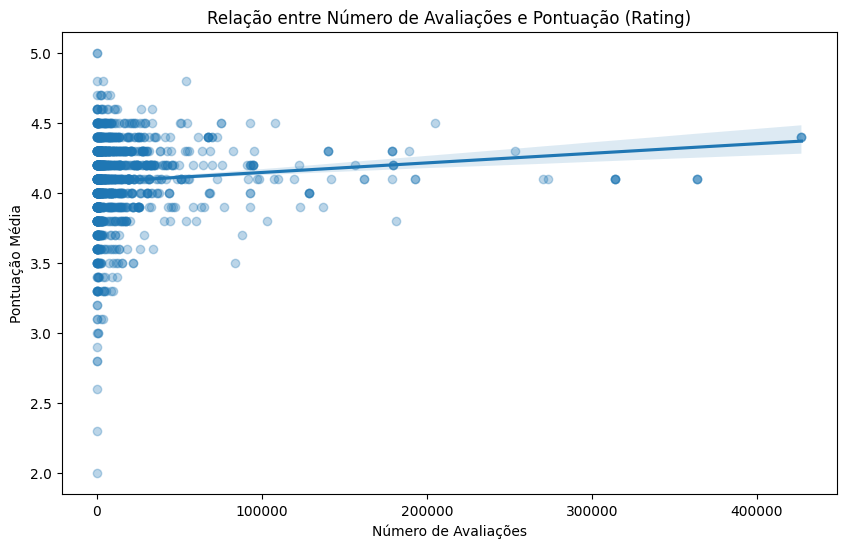

In [ ]:
print("\n--- Análise da Hipótese 2: Número de Avaliações vs. Classificação ---")

# Correlação de Pearson
pearson_corr_h2, pearson_p_value_h2 = stats.pearsonr(unificada_df['rating_count'], unificada_df['rating'])
print(f"Correlação de Pearson entre Rating Count e Rating: {pearson_corr_h2:.4f}, P-valor: {pearson_p_value_h2:.4f}")

# Correlação de Spearman
spearman_corr_h2, spearman_p_value_h2 = stats.spearmanr(unificada_df['rating_count'], unificada_df['rating'])
print(f"Correlação de Spearman entre Rating Count e Rating: {spearman_corr_h2:.4f}, P-valor: {spearman_p_value_h2:.4f}")

# Visualização para a Hipótese 2: Número de Avaliações vs. Classificação
plt.figure(figsize=(10, 6))
sns.regplot(x='rating_count', y='rating', data=unificada_df, scatter_kws={'alpha':0.3}) # scatter_kws para ajustar a transparência dos pontos
plt.title('Relação entre Número de Avaliações e Pontuação (Rating)')
plt.xlabel('Número de Avaliações')
plt.ylabel('Pontuação Média')
plt.show()

Existe uma leve tendência de que produtos mais avaliados tenham notas um pouco maiores, mas essa relação é fraca e não pode ser considerada um fator determinante da qualidade percebida. Portanto, embora os dados indiquem uma leve relação positiva, o número de avaliações por si só não é um bom preditor da pontuação média de um produto, logo, não podemos confirmar a hipótese.

### Hipótese 3 - Produtos com preços reais mais altos (sem desconto aplicado) tendem a ter uma avaliação maior?


--- Análise da Hipótese 3: Preço Real vs. Avaliação ---
Correlação de Pearson entre Preço Real e Rating: 0.1280, P-valor: 0.0000
Correlação de Spearman entre Preço Real e Rating: 0.0325, P-valor: 0.2320


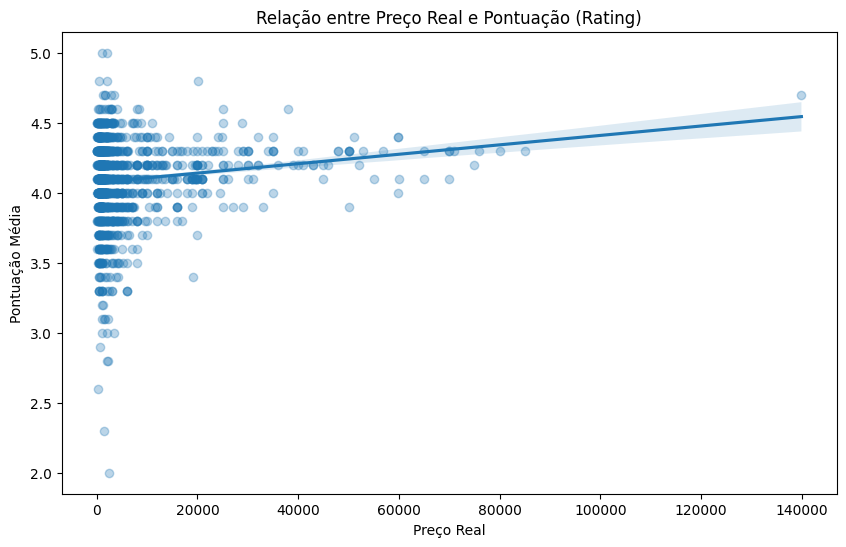

In [ ]:
print("\n--- Análise da Hipótese 3: Preço Real vs. Avaliação ---")

# Correlação de Pearson
pearson_corr_h3, pearson_p_value_h3 = stats.pearsonr(unificada_df['actual_price'].fillna(0), unificada_df['rating']) # Apenas para o cálculo da correlação se houver NaN
print(f"Correlação de Pearson entre Preço Real e Rating: {pearson_corr_h3:.4f}, P-valor: {pearson_p_value_h3:.4f}")

# Correlação de Spearman
spearman_corr_h3, spearman_p_value_h3 = stats.spearmanr(unificada_df['actual_price'].fillna(0), unificada_df['rating'])
print(f"Correlação de Spearman entre Preço Real e Rating: {spearman_corr_h3:.4f}, P-valor: {spearman_p_value_h3:.4f}")

# Visualização para a Hipótese 3: Preço Real vs. Avaliação
plt.figure(figsize=(10, 6))
sns.regplot(x='actual_price', y='rating', data=unificada_df, scatter_kws={'alpha':0.3}) # scatter_kws para ajustar a transparência dos pontos
plt.title('Relação entre Preço Real e Pontuação (Rating)')
plt.xlabel('Preço Real')
plt.ylabel('Pontuação Média')
plt.show()

Apesar da correlação de Pearson apontar uma fraca relação positiva entre preço real e pontuação média, essa evidência não é consistente, pois a correlação de Spearman não confirmou o resultado. Portanto, o preço real não é um bom indicador de qualidade percebida (rating). Isso sugere que outros fatores, como marca, funcionalidade, experiência do usuário ou marketing, influenciam mais fortemente a avaliação dos produtos.

### Hipótese 4 - Produtos com um preço real mais alto tendem a ter descontos absolutos maiores (ou seja, o valor do desconto em R$)?


--- Análise da Hipótese 4: Preço Real vs. Diferença de Preço ---
Correlação de Pearson entre Preço Real e Diferença de Preço: 0.9108, P-valor: 0.0000
Correlação de Spearman entre Preço Real e Diferença de Preço: 0.8952, P-valor: 0.0000


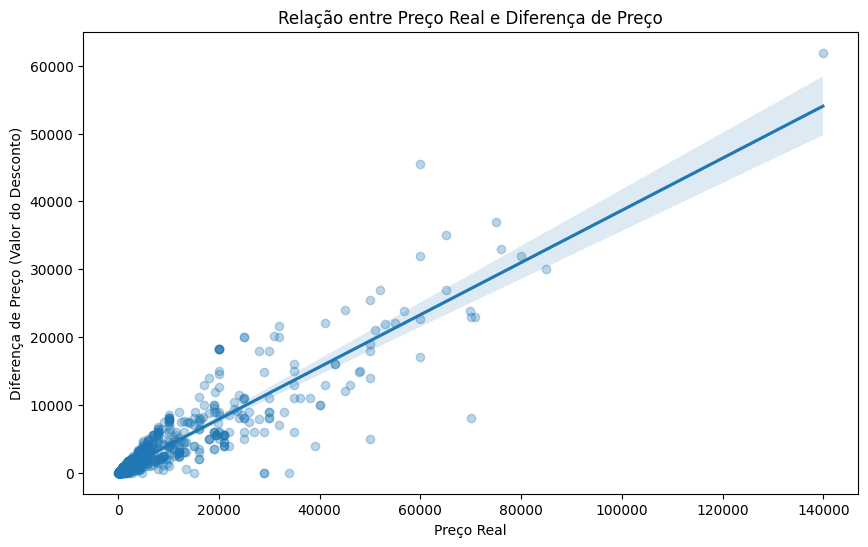

In [ ]:
print("\n--- Análise da Hipótese 4: Preço Real vs. Diferença de Preço ---")

# Correlação de Pearson
pearson_corr_h4, pearson_p_value_h4 = stats.pearsonr(unificada_df['actual_price'].fillna(0), unificada_df['diferenca_preco'].fillna(0))
print(f"Correlação de Pearson entre Preço Real e Diferença de Preço: {pearson_corr_h4:.4f}, P-valor: {pearson_p_value_h4:.4f}")

# Correlação de Spearman
spearman_corr_h4, spearman_p_value_h4 = stats.spearmanr(unificada_df['actual_price'].fillna(0), unificada_df['diferenca_preco'].fillna(0))
print(f"Correlação de Spearman entre Preço Real e Diferença de Preço: {spearman_corr_h4:.4f}, P-valor: {spearman_p_value_h4:.4f}")

# Visualização para a Hipótese 4: Preço Real vs. Diferença de Preço
plt.figure(figsize=(10, 6))
sns.regplot(x='actual_price', y='diferenca_preco', data=unificada_df, scatter_kws={'alpha':0.3}) # scatter_kws para ajustar a transparência dos pontos
plt.title('Relação entre Preço Real e Diferença de Preço')
plt.xlabel('Preço Real')
plt.ylabel('Diferença de Preço (Valor do Desconto)')
plt.show()

Esses valores indicam uma relação positiva muito forte e estatisticamente significativa entre o preço real e o valor do desconto. Ou seja, produtos mais caros tendem a apresentar maiores descontos absolutos, confirmando fortemente a Hipótese 4.

Além disso, um gráfico de dispersão confirmou visualmente essa tendência com uma clara linha ascendente, evidenciando uma forte relação linear.

# Confirmação da Hipótese 4 com Testes Complementares

Como a Hipótese 4 mostrou uma correlação forte e positiva entre o preço real e a diferença de preço no dataset geral, o próximo passo lógico é investigar se essa relação se mantém consistente em todas as categorias principais ou se existem variações significativas entre elas.

### Teste ANOVA para Comparar a Média da Diferença de Preço entre Categorias

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Realizar o teste ANOVA
model = ols('diferenca_preco ~ C(categoria_principal)', data=unificada_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Tabela ANOVA:")
display(anova_table)

# Interpretar o resultado do ANOVA
alpha = 0.05 # Nível de significância
p_value = anova_table['PR(>F)'][0]

Tabela ANOVA:


,sum_sq,df,F,PR(>F)
C(categoria_principal),2.760843e+09,8.0,16.886562,4.489483e-24
Residual,2.756909e+10,1349.0,NaN,NaN


/tmp/ipython-input-349-3159587287.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


**O Resultado do ANOVA para a média da diferenca_preco entre as categorias principais foi:** p-valor = 4,49e-24

→ **Rejeita-se a hipótese nula**, indicando que há **diferenças estatisticamente significativas** na média de desconto entre as categorias.

### Teste Post-Hoc de Tukey HSD para Comparar as Médias da Diferença de Preço entre Categorias Principais

O Teste de Tukey HSD (Honestly Significant Difference) é uma análise post-hoc, ou seja, é realizada após o teste ANOVA, quando já se sabe que há diferenças significativas entre grupos. Nesse caso, foi realizado para identificar quais pares de categorias apresentam diferenças estatisticamente significativas na média do desconto.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Realizar o teste de Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=unificada_df['diferenca_preco'],
                                  groups=unificada_df['categoria_principal'],
                                  alpha=0.05)

print("Resultado do Teste de Tukey HSD:")

# Converter resultado em DataFrame
tukey_df = pd.DataFrame(tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

# Converter colunas para tipos apropriados
tukey_df["meandiff"] = tukey_df["meandiff"].astype(float)
tukey_df["lower"] = tukey_df["lower"].astype(float)
tukey_df["upper"] = tukey_df["upper"].astype(float)
tukey_df["p-adj"] = tukey_df["p-adj"].astype(float)
tukey_df["reject"] = tukey_df["reject"].astype(bool)

# Exibir apenas as 5 primeiras linhas para não poluir o notebook
display(tukey_df.head(5))

print("\nNote: Apenas as 5 primeiras combinações estão sendo exibidas para facilitar a visualização no notebook.")

Resultado do Teste de Tukey HSD:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Car&Motorbike,Computers&Accessories,-753.2681,1.0000,-14816.7938,13310.2576,False
1,Car&Motorbike,Electronics,2530.7883,0.9998,-11528.2736,16589.8502,False
2,Car&Motorbike,Health&PersonalCare,-660.0000,1.0000,-20522.5034,19202.5034,False
3,Car&Motorbike,Home&Kitchen,173.6604,1.0000,-13886.9519,14234.2726,False
4,Car&Motorbike,HomeImprovement,-1199.0000,1.0000,-18400.4325,16002.4325,False



Note: Apenas as 5 primeiras combinações estão sendo exibidas para facilitar a visualização no notebook.


Foram identificados diversos pares de categorias com **diferenças significativas**.

A **Hipótese 4 foi confirmada**: existe uma forte relação positiva entre o preço real do produto e o valor absoluto do desconto. No entanto, essa relação **varia entre as categorias de produto**. Categorias como **Electronics** e **Home & Kitchen** tendem a oferecer os **maiores descontos absolutos médios**, enquanto outras, como *Car & Motorbike*, oferecem menos.

### Visualização da Média da Diferença de Preço por Categoria Principal

/tmp/ipython-input-351-961648281.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_diferenca_preco_por_categoria.index, y=mean_diferenca_preco_por_categoria.values, palette='viridis')


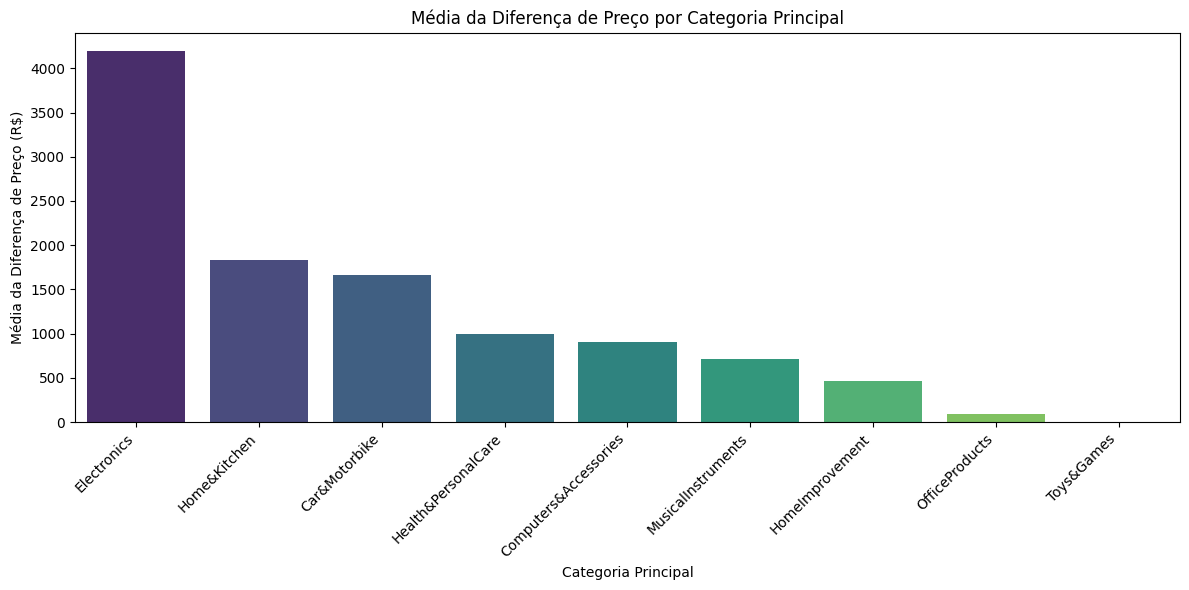

In [ ]:
# Calcular a média da diferenca_preco para cada categoria principal
mean_diferenca_preco_por_categoria = unificada_df.groupby('categoria_principal')['diferenca_preco'].mean().sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_diferenca_preco_por_categoria.index, y=mean_diferenca_preco_por_categoria.values, palette='viridis')
plt.title('Média da Diferença de Preço por Categoria Principal')
plt.xlabel('Categoria Principal')
plt.ylabel('Média da Diferença de Preço (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O gráfico, junto ao teste de Tukey HSD, mostra que “Electronics” e “Home&Kitchen” têm os maiores descontos absolutos médios, e que essas diferenças são estatisticamente significativas em muitos casos.

Também indica que algumas categorias não diferem estatisticamente, mesmo com pequenas diferenças visuais. Isso confirma a Hipótese 4, mostrando que categorias com preços mais altos apresentam maiores descontos absolutos, destacando “Electronics” como a principal.

# Cálculo Risco Relativo

In [ ]:
# 1. Criar a variável binária "alta_avaliacao" (rating >= 4.0)
unificada_df['alta_avaliacao'] = (unificada_df['rating'] >= 4.0).astype(int)

# 2. Filtrar o DataFrame para incluir apenas as categorias "Electronics" e "Home&Kitchen"
grupos_comparacao_df = unificada_df[unificada_df['categoria_principal'].isin(['Electronics', 'Home&Kitchen'])].copy()

# 3. Criar a tabela de contingência 2x2
if 'categoria_principal' in grupos_comparacao_df.columns and not grupos_comparacao_df['categoria_principal'].isnull().any():
    tabela_contingencia = pd.crosstab(grupos_comparacao_df['categoria_principal'], grupos_comparacao_df['alta_avaliacao'])
    print("Tabela de Contingência:")
    display(tabela_contingencia)

    # Renomear as colunas
    tabela_contingencia.columns = ['Baixa Avaliação', 'Alta Avaliação']
    tabela_contingencia.index.name = 'Categoria Principal'
    print("\nTabela de Contingência (com nomes claros):")
    display(tabela_contingencia)

    # 4. Calcular o Risco Relativo
    if 'Electronics' in tabela_contingencia.index and 'Home&Kitchen' in tabela_contingencia.index:
        a = tabela_contingencia.loc['Electronics', 'Alta Avaliação']
        b = tabela_contingencia.loc['Electronics', 'Baixa Avaliação']
        c = tabela_contingencia.loc['Home&Kitchen', 'Alta Avaliação']
        d = tabela_contingencia.loc['Home&Kitchen', 'Baixa Avaliação']

        # Evitar divisão por zero
        prob_electronics = a / (a + b) if (a + b) > 0 else 0
        prob_homekitchen = c / (c + d) if (c + d) > 0 else 0

        if prob_homekitchen > 0:
            risco_relativo = prob_electronics / prob_homekitchen
            print(f"\nProbabilidade de Alta Avaliação em Electronics: {prob_electronics:.4f}")
            print(f"Probabilidade de Alta Avaliação em Home&Kitchen: {prob_homekitchen:.4f}")
            print(f"Risco Relativo (Electronics vs. Home&Kitchen para Alta Avaliação): {risco_relativo:.4f}")

Tabela de Contingência:


alta_avaliacao,0,1
categoria_principal,,
Electronics,129,367
Home&Kitchen,144,303



Tabela de Contingência (com nomes claros):


,Baixa Avaliação,Alta Avaliação
Categoria Principal,,
Electronics,129,367
Home&Kitchen,144,303



Probabilidade de Alta Avaliação em Electronics: 0.7399
Probabilidade de Alta Avaliação em Home&Kitchen: 0.6779
Risco Relativo (Electronics vs. Home&Kitchen para Alta Avaliação): 1.0916


O valor de **RR = 1,0916** indica que produtos da categoria **Electronics têm aproximadamente 1,09 vezes mais chance** de receber uma alta avaliação em comparação com produtos da categoria **Home&Kitchen**. Isso equivale a um **aumento de 9%** na probabilidade de avaliação alta para a categoria Electronics.

Portanto, embora exista uma associação positiva entre a categoria *Electronics* e a alta avaliação, a **diferença observada é pequena** (9%) e a **magnitude da associação é fraca**.

### Teste Qui-quadrado para Significância da Associação entre Categoria e Alta Avaliação

Após o cálculo do Risco Relativo (RR = 1,09) entre as categorias Electronics e Home&Kitchen, foi realizado um teste Qui-quadrado com o objetivo de verificar se essa diferença na probabilidade de obter alta avaliação é estatisticamente significativa ou se pode ter ocorrido por acaso.

In [ ]:
from scipy.stats import chi2_contingency

# chi2_contingency retorna: estatística qui-quadrado, p-valor, graus de liberdade, frequências esperadas
chi2_stat, p_value_chi2, dof, expected_freq = chi2_contingency(tabela_contingencia)

print("Resultado do Teste Qui-quadrado:")
print(f"Estatística Qui-quadrado: {chi2_stat:.4f}")
print(f"P-valor: {p_value_chi2:.4f}")
print(f"Graus de Liberdade: {dof}")
print("\nFrequências Esperadas:")
display(pd.DataFrame(expected_freq, columns=tabela_contingencia.columns, index=tabela_contingencia.index))

Resultado do Teste Qui-quadrado:
Estatística Qui-quadrado: 4.1068
P-valor: 0.0427
Graus de Liberdade: 1

Frequências Esperadas:


,Baixa Avaliação,Alta Avaliação
Categoria Principal,,
Electronics,143.592789,352.407211
Home&Kitchen,129.407211,317.592789


O valor do p-valor (**0,0427**) é **menor que o nível de significância de 0,05**, o que nos leva a **rejeitar a hipótese nula**. Isso significa que há uma **associação estatisticamente significativa** entre a categoria do produto (*Electronics* vs *Home&Kitchen*) e a chance de receber uma **alta avaliação**.

Esse resultado reforça a análise anterior baseada no **Risco Relativo (RR = 1,09)**, indicando que a **diferença observada não ocorreu por acaso**. Portanto, produtos da categoria *Electronics* têm, de fato, uma chance ligeiramente maior (9%) de obter uma alta avaliação em comparação com produtos de *Home&Kitchen*, e essa diferença é **estatisticamente confirmada.**

# Conclusões da Análise de Dados

A análise revelou que **produtos com preços reais mais altos tendem a receber descontos monetários maiores**, o que confirma a Hipótese 4 com alta correlação (Pearson = 0.9108; Spearman = 0.8952). Em contrapartida, as hipóteses 1, 2 e 3 não foram fortemente sustentadas pelos dados.

A **Hipótese 1** (maior desconto leva a melhor avaliação) foi refutada, mostrando uma correlação fraca e negativa. A **Hipótese 2**, que relaciona número de avaliações com nota, indicou uma associação positiva fraca, mas estatisticamente significativa. Já a **Hipótese 3**, que sugeria que produtos mais caros teriam melhores notas, foi descartada por ausência de relação clara.

Na análise por categorias, o **Risco Relativo (RR)** indicou que produtos de *Electronics* têm 1,09 vezes mais chance de alta avaliação do que *Home&Kitchen*. No entanto, frente a *Computers&Accessories* (RR = 0.90) e *OfficeProducts* (RR = 0.74), *Electronics* mostrou menor probabilidade de avaliações altas. Todos esses resultados foram confirmados com **testes de Qui-quadrado**, indicando associações estatisticamente significativas.

Esses dados mostram que a **categoria do produto impacta mais as avaliações do que preço ou desconto isoladamente**, com destaque para *Computers&Accessories* e *OfficeProducts*, que apresentam melhor desempenho em notas altas.

## Recomendações Estratégicas

Com base nos resultados, recomenda-se:

- **Não depender apenas de descontos** para influenciar avaliações. A percepção de qualidade e valor é mais determinante.

- **Melhorar o posicionamento e apresentação de produtos** em categorias com menor avaliação média, como *Electronics* e *Home&Kitchen*.

- **Estudar boas práticas das categorias mais bem avaliadas**, como *Computers&Accessories* e *OfficeProducts*, para replicar estratégias bem-sucedidas.

- **Personalizar ações por categoria**, adotando campanhas específicas conforme o comportamento dos consumidores.

- **Implementar testes A/B e monitoramento contínuo** de avaliações por categoria, permitindo ajustes estratégicos baseados em dados reais.